## PART 1: Data Loading and General EDA

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

In [100]:
data.head(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,age_freq
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,31-40
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,31-40


In [101]:
data.tail(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,age_freq
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,31-40
23633,23e3c107-f2fc-48c2-abbc-7b809bf6f102,d8d7a64e-8419-4421-910a-a7cf709a900b,85.03,2024-01-23 02:46:52,credit card,clothing,4,38,Holtport,tablet,116.188.254.162,"289 Adams Wells\nWest Joeltown, LA 69190","289 Adams Wells\nWest Joeltown, LA 69190",0,203,2,31-40


In [14]:
data.shape

(23634, 16)

In [16]:
data.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [17]:
data.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [18]:
data.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [19]:
data.select_dtypes(include=['object', 'category']).nunique()


Transaction ID       23634
Customer ID          23634
Transaction Date     23607
Payment Method           4
Product Category         5
Customer Location    14868
Device Used              3
IP Address           23634
Shipping Address     23634
Billing Address      23634
dtype: int64

In [22]:
data['Is Fraudulent'].value_counts(normalize=True)

Is Fraudulent
0    0.948295
1    0.051705
Name: proportion, dtype: float64

In [37]:
max_amt=data['Transaction Amount'].max()
min_amt=data['Transaction Amount'].min()
print(f'Maximum Transaction amount was ${max_amt}')
print(f'Minimum Transaction amount was ${min_amt}')

Maximum Transaction amount was $9716.5
Minimum Transaction amount was $10.0


## Observation

- The dataset contains 23,634 rows and 16 columns.
- There are no missing values in the dataset.
- The dataset consists of :
  - 1 Float64 type column
  - 10 Object type columns
  - 5   Int64 type columns
- The 'Is Fraudulent' column is the target variable that represents whether the   transaction is fraudulent or not, with 0 indicating not fraudulent and 1       indicating fraudulent.
- The summary statistics reveal that the average transaction amount is           approximately 229.37, with standard deviation of 282.05. The minimum           transaction amount is 10.00, and the maximum is 9716.50.
- The value counts for the target variable 'Is Fraudulent' show that 94.83% of   the transactions are not fraudulent, while 5.17% are fraudulent, indicating     an imbalanced dataset.

## PART 2 : Visualization 

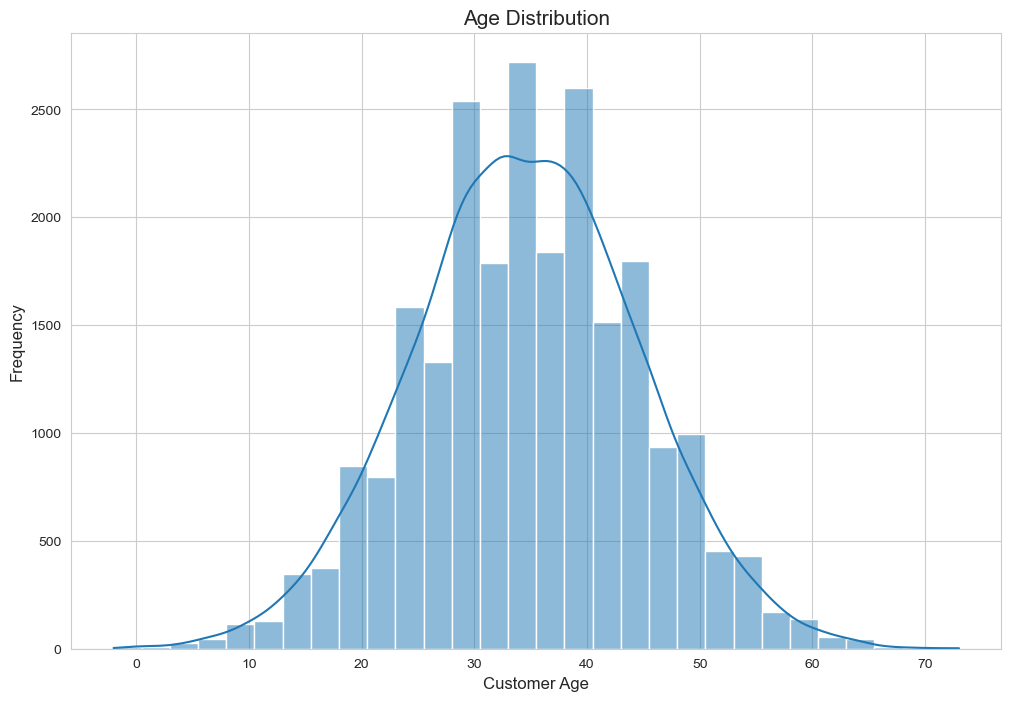

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.histplot(data['Customer Age'],kde=True,bins=30)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

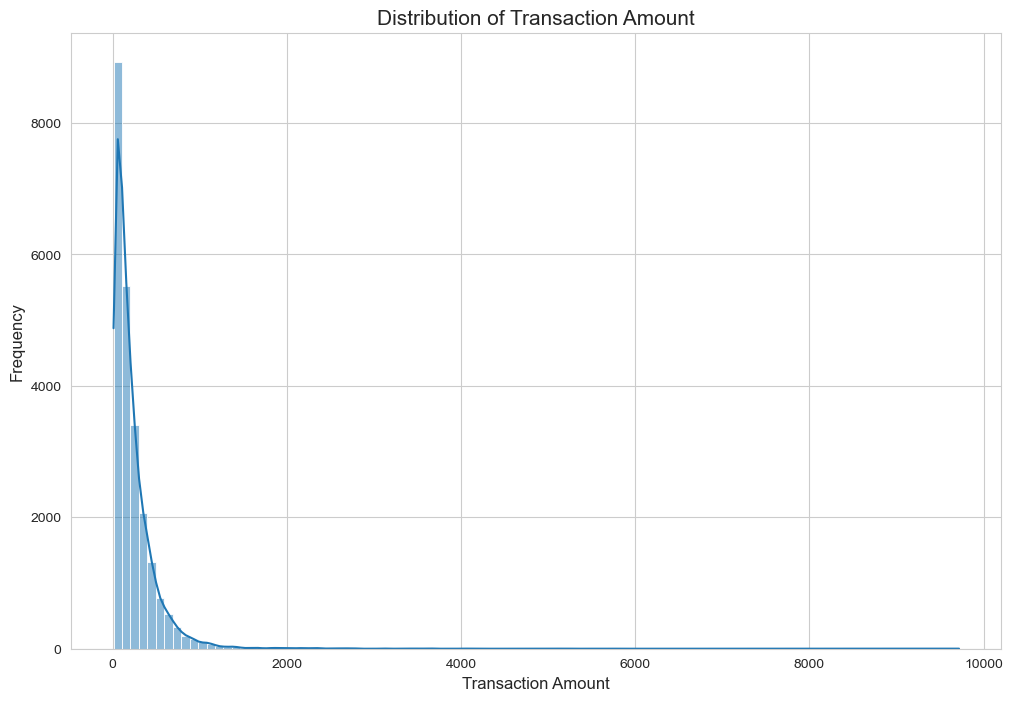

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data['Transaction Amount'],bins=100,kde=True)
plt.title('Distribution of Transaction Amount', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [78]:
def age_freq(x):
    if 0 <= x <= 10:
        return '0-10'
    elif 11 <= x <= 20:
        return '11-20'
    elif 21 <= x <= 30:
        return '21-30'
    elif 31 <= x <= 40:
        return '31-40'
    elif 41 <= x <= 50:
        return '41-50'
    elif 51 <= x <= 60:
        return '51-60'
    else:
        return 'Over 60'


In [79]:
data['age_freq']=data['Customer Age'].apply(age_freq)

In [80]:
data['age_freq'].value_counts()

age_freq
31-40      8947
21-30      6243
41-50      5239
11-20      1697
51-60      1192
0-10        201
Over 60     115
Name: count, dtype: int64

Text(0, 0.5, 'Frequency of transaction')

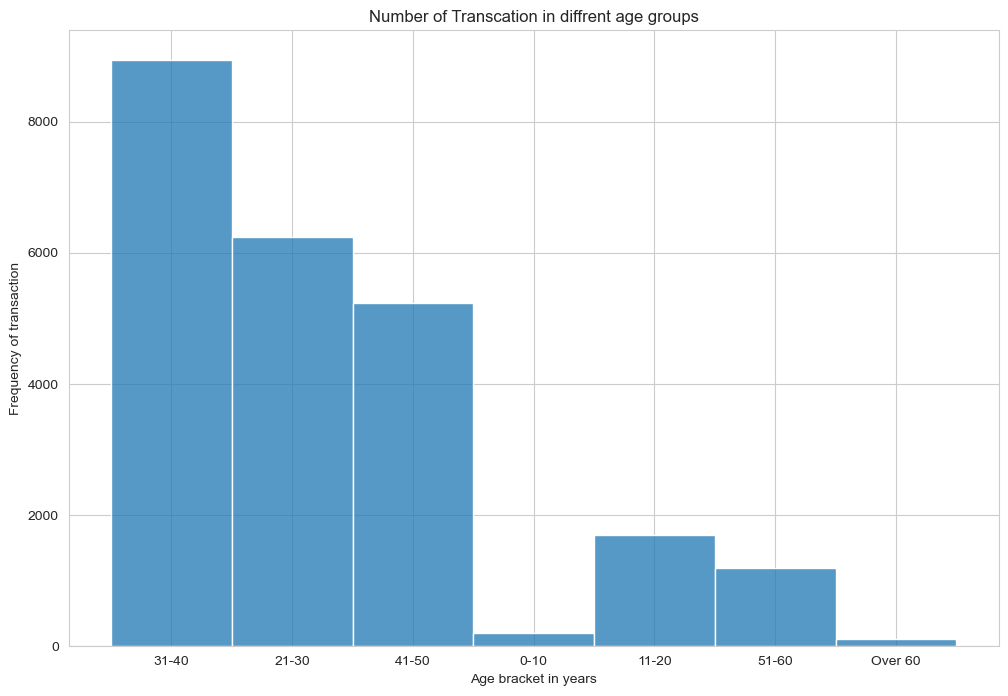

In [96]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data['age_freq'])
plt.title('Number of Transcation in diffrent age groups')
plt.xlabel('Age bracket in years')
plt.ylabel('Frequency of transaction')

([<matplotlib.patches.Wedge at 0x2e03c759950>,
 [Text(0.409544364418016, 1.020917926952722, '31-40'),
  Text(-1.097542115401531, -0.0734935706026912, '21-30'),
  Text(0.024562740336181048, -1.0997257257094504, '41-50'),
  Text(0.8911031745662823, -0.644930331336567, '11-20'),
  Text(1.0678256708778129, -0.2640991037742251, '51-60'),
  Text(1.0981952140526392, -0.06298628288665645, '0-10'),
  Text(1.0998714764567017, -0.016814733924607864, 'Over 60')],
 [Text(0.22338783513709962, 0.5568643237923938, '37.9%'),
  Text(-0.5986593356735622, -0.04008740214692246, '26.4%'),
  Text(0.01339785836518966, -0.5998503958415183, '22.2%'),
  Text(0.48605627703615395, -0.3517801807290365, '7.2%'),
  Text(0.5824503659333524, -0.14405405660412277, '5.0%'),
  Text(0.5990155713014396, -0.0343561543018126, '0.9%'),
  Text(0.5999298962491099, -0.009171673049786108, '0.5%')])

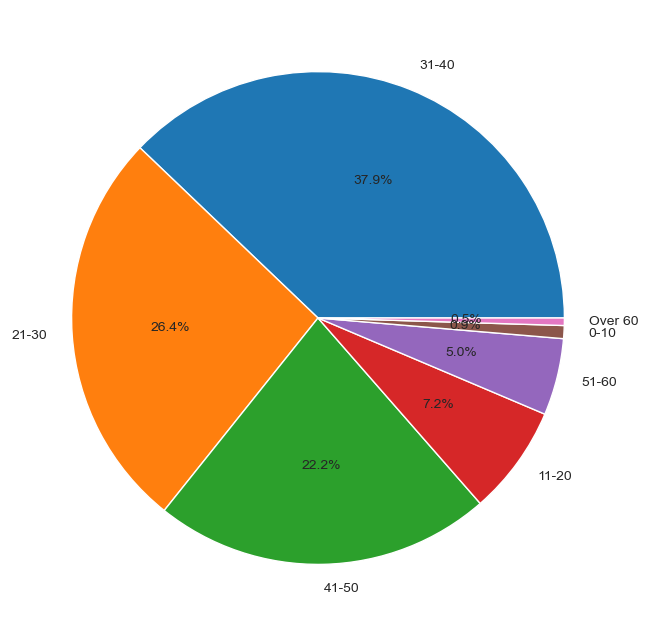

In [119]:
plt.figure(figsize=(12,8))
age_ind=data['age_freq'].value_counts().index
age_val=data['age_freq'].value_counts().values
plt.pie(x=age_val,labels=age_ind,autopct='%1.1f%%')

Text(0.5, 1.0, 'Payment Method Distribution')

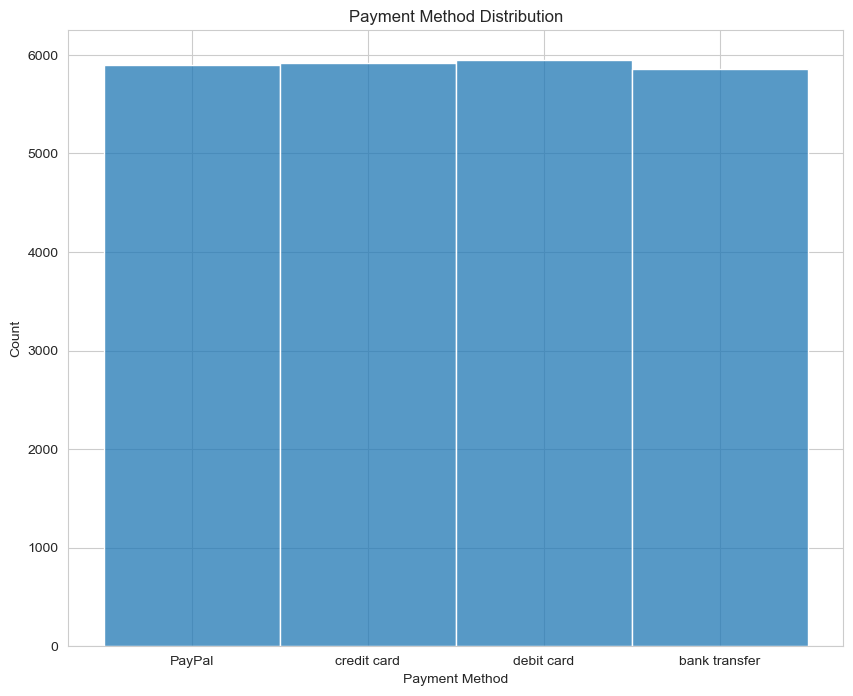

In [105]:
plt.figure(figsize=(10,8))
sns.histplot(data['Payment Method'])
plt.title("Payment Method Distribution")

Text(0.5, 1.0, 'Shopping Category Distribution')

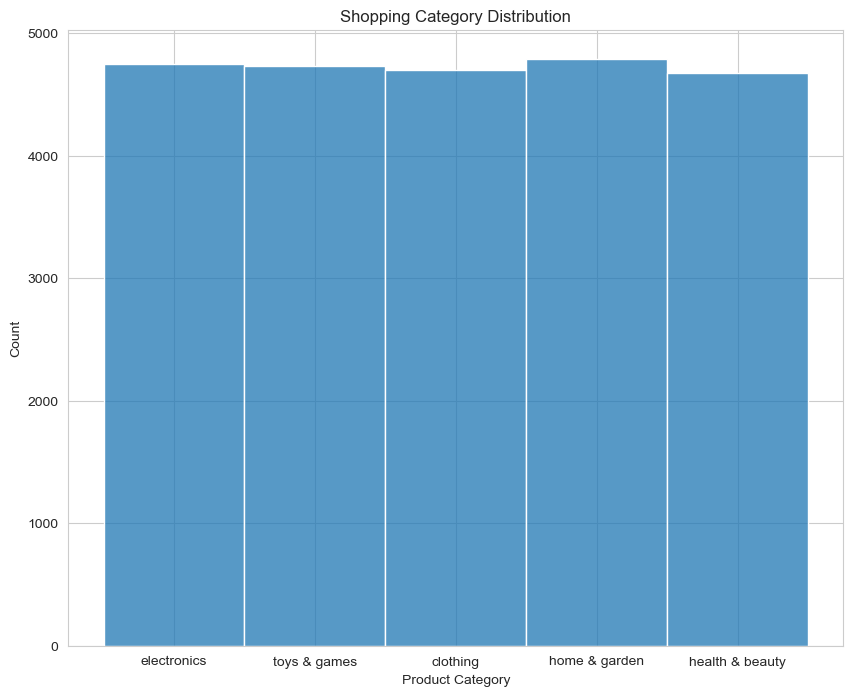

In [111]:
plt.figure(figsize=(10,8))
sns.histplot(data['Product Category'])
plt.title("Shopping Category Distribution")

([<matplotlib.patches.Wedge at 0x2e03c6b9ad0>,
 [Text(0.8848031932003605, 0.6535467154706279, 'home & garden'),
  Text(-0.3592722871465932, 1.0396746720433543, 'electronics'),
  Text(-1.09973862817631, -0.023978108701230492, 'toys & games'),
  Text(-0.320476043613333, -1.0522809061604916, 'clothing'),
  Text(0.8946899507169555, -0.6399452258483471, 'health & beauty')],
 [Text(0.48261992356383293, 0.3564800266203425, '20.3%'),
  Text(-0.1959667020799599, 0.5670952756600113, '20.1%'),
  Text(-0.5998574335507144, -0.013078968382489358, '20.0%'),
  Text(-0.1748051146981816, -0.5739714033602681, '19.9%'),
  Text(0.48801270039106653, -0.3490610322809166, '19.8%')])

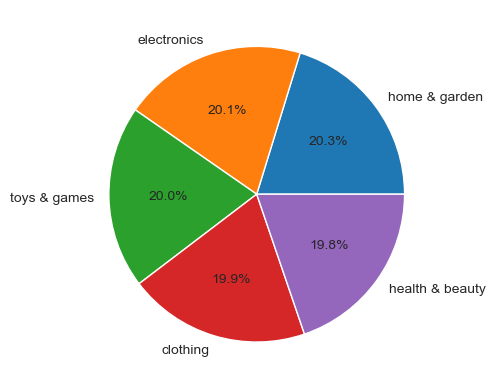

In [116]:
prod_ind=data['Product Category'].value_counts().index
prod_val=data['Product Category'].value_counts().values
plt.pie(x=prod_val,labels=prod_ind,autopct='%1.1f%%')

## Observations

- The Customer age is normally distributed through out the data set
- Majority of the transactions are under 2000 dollars
- people from age between 21 to 50 performed majority of the transactions.
- payments methods are equally distributed amoung Paypal, Credit card, debit card and bank transfer

## Distribution of data between Fraudulent and Non Fraudulent Data

Text(0.5, 1.0, 'Distribution of Is Fraudulent')

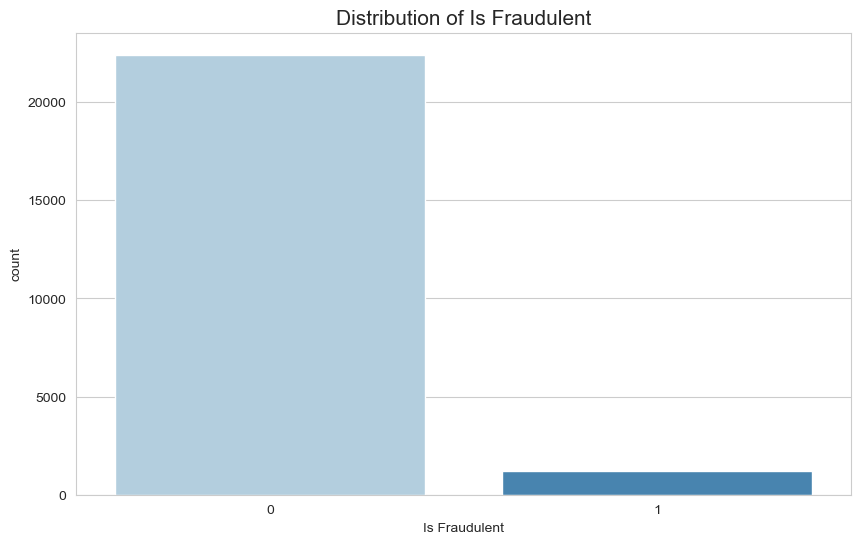

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Is Fraudulent'], palette='Blues')
plt.title('Distribution of Is Fraudulent', fontsize=15)

## Correlation Matrix

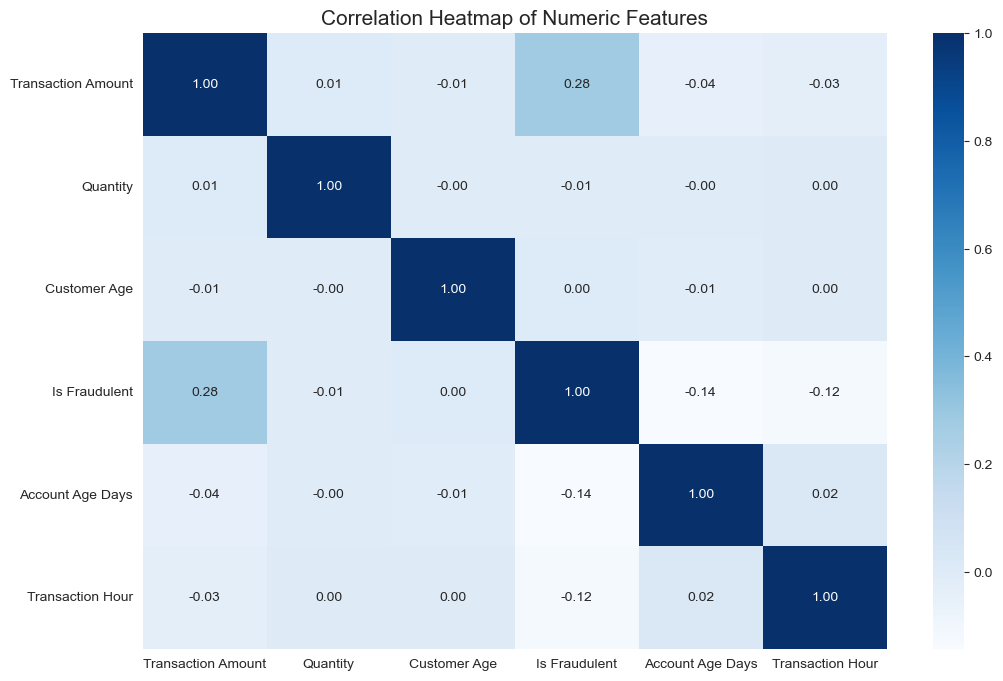

In [122]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features', fontsize=15)
plt.show()

## Observations

- The correlation heatmap shows no strong correlation between the numerical features and the target variable 'Is Fraudulent'.
- The highest correlation observed is between 'Transaction Amount' and 'Quantity'.
- The dataset is imbalanced with respect to the target variable, which might require special handling during modeling to improve   fraud detection performance.


## Part 3 : Feature Engineering of Data

In [125]:
data['Address_Mismatch'] = (data['Shipping Address'] != data['Billing Address']).astype(int)
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Transaction_Weekday'] = data['Transaction Date'].dt.dayofweek


cust_freq = data['Customer ID'].value_counts().to_dict()
data['cust_Frequency'] = data['Customer ID'].map(cust_freq)

avg_amount_per_category = data.groupby('Product Category')['Transaction Amount'].transform('mean')
data['Amount_Higher_Than_Average'] = (data['Transaction Amount'] > avg_amount_per_category).astype(int)


In [130]:
data.shape

(23634, 21)

In [131]:
data.head(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,...,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,age_freq,Address_Mismatch,Transaction_Weekday,cust_Frequency,Amount_Higher_Than_Average
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,31-40,0,6,1,0
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,...,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,31-40,0,0,1,1


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

X = data.drop(['Transaction ID', 'Customer ID', 'Transaction Date', 'Is Fraudulent',
               'Shipping Address', 'Billing Address', 'IP Address'], axis=1)
y = data['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

In [134]:
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4483
           1       0.73      0.10      0.17       244

    accuracy                           0.95      4727
   macro avg       0.84      0.55      0.57      4727
weighted avg       0.94      0.95      0.93      4727



## Observations

- Precision for class 0 (0.95) is quite high, indicating that the model performs well in correctly identifying instances that belong to non fradulant class
- Recall for class 1 (0.10) is relatively low, suggesting that the model struggles to correctly identify instances belonging to fradulant class. This is further supported by the low F1-score for class 1 (0.17), indicating poor performance in terms of both precision and recall for this class.
- The overall accuracy of the model is 95%, which might look good at first glance. However, considering the class imbalance (4483 instances of class 0 vs. 244 instances of class 1), accuracy alone can be misleading. It's important to delve deeper into precision, recall, and F1-score for each class to understand the model's performance comprehensively.
- The macro average F1-score (0.57) indicates the harmonic mean of precision and recall across both classes. It suggests a moderate performance overall, with room for improvement, particularly in classifying instances from class 1.
- The weighted average F1-score (0.93) reflects the overall performance of the model across both classes, taking into account the class distribution. While it shows good performance, it's essential to address the issues with class 1 to enhance the model's effectiveness, especially if correctly identifying instances in class 1.